## Data Challenge Assignment 
#### Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow

On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for our business. In this exercise we provide you with a sample of information we collected from our fellows from the moment they joined our program. 

##### The main goal of your analysis is to derive insights around if a fellow will ultimately be placed at a company and how long until a placement can be expected.

## Objectives






Perform exploratory Data Analysis and determine Training Labels

create a column for the class
Standardize the data
Split into training data and test data
-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

Find the method performs best using test data

### Import Libraries and Define Auxiliary Functions
We will import the following libraries for the lab

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not place', 'placed']); ax.yaxis.set_ticklabels(['did not place', 'placed']) 
    plt.show() 

In [3]:
df= pd.read_csv('Pathrise_processedData02.csv')

In [ ]:
#X= df.drop('placed', axis=1)
#Y= df['placed']

Create a NumPy array from the column <code>Placed</code> in <code>df</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [4]:
y=df['placed'].to_numpy()
y

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0.

Standardize the data in X then reassign it to the variable X using the transform provided below.

In [5]:
# students get this 
transform = preprocessing.StandardScaler()

In [6]:
df_x=df.drop('placed', axis=1)

In [7]:
x= transform.fit_transform(df_x)

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

X_train, X_test, Y_train, Y_test

In [8]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.2, random_state=2)

Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

#### logistic regression

In [9]:
Lr= LogisticRegression()

In [10]:
parametersLr ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [11]:
logreg_cv= GridSearchCV(Lr, parametersLr, cv=10)

In [12]:
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [13]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6050632911392404


##### Calculate the accuracy on the test data using the method score:

In [14]:
logreg_cv.score(X_test, Y_test)

0.6161616161616161

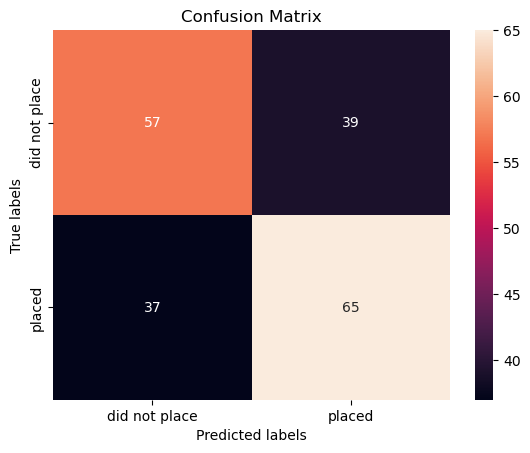

In [15]:
yhatlog=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhatlog)

Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

#### support vector machine

In [16]:
#svm = SVC()

In [17]:
#parametersSVM = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
             # 'C': np.logspace(-3, 3, 5),
             # 'gamma':np.logspace(-3, 3, 5)}

In [18]:
#svm_cv= GridSearchCV(svm, parametersSVM, cv=10)

Calculate the accuracy on the test data using the method score:

In [ ]:
#svm_cv.score(X_test, Y_test)

Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

#### decision tree

In [16]:
tree = DecisionTreeClassifier()

In [17]:
parametersTree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [18]:
tree_cv= GridSearchCV(tree, parametersTree, cv=10)

In [19]:
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [20]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.7177215189873418


Calculate the accuracy of tree_cv on the test data using the method score:

In [21]:
tree_cv.score(X_test, Y_test)

0.601010101010101

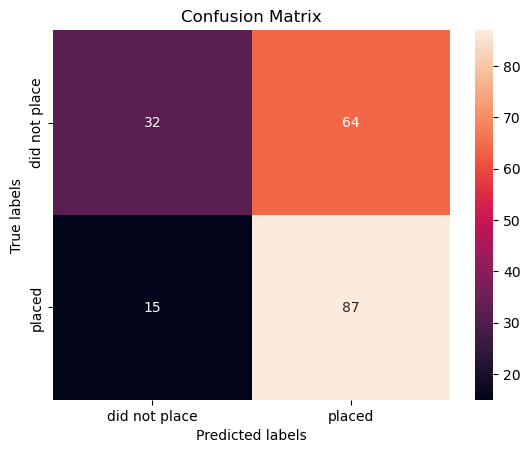

In [22]:
yhattree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhattree)

Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

### k nearest neighbors

In [23]:
KNN = KNeighborsClassifier()

In [24]:
parametersKnn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}


In [25]:
knn_cv= GridSearchCV(KNN, parametersKnn, cv=10)

In [26]:
knn_cv.fit(X_train, Y_train)

C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [27]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.5734177215189874


Calculate the accuracy of knn_cv on the test data using the method score:

In [28]:
knn_cv.score(X_test, Y_test)

C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5505050505050505

C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


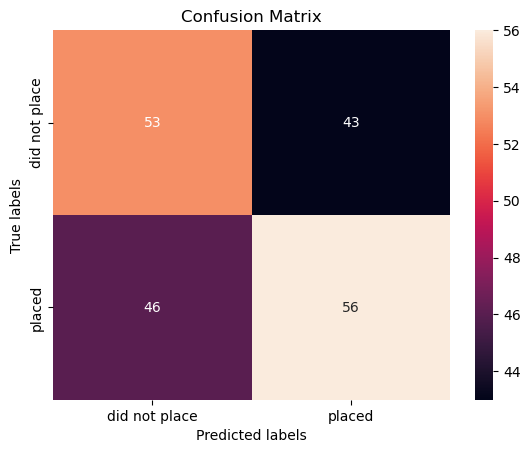

In [29]:
yhatknn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhatknn)

#### Find the method performs best:

In [30]:
accu=[]
Method=[]

In [31]:
accu.append(logreg_cv.score(X_test, Y_test))
Method.append('logestic regression')
#-------------------------------------
#accu.append(svm_cv.score(X_test, Y_test))
#Method.append('SVM')
#--------------------------------------
accu.append(tree_cv.score(X_test, Y_test))
Method.append('Decission Tree')
#---------------------------------------
accu.append(knn_cv.score(X_test, Y_test))
Method.append('KNN')

C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
print(accu)
print(Method)

[0.6161616161616161, 0.601010101010101, 0.5505050505050505]
['logestic regression', 'Decission Tree', 'KNN']


In [33]:
import matplotlib.pyplot as plt

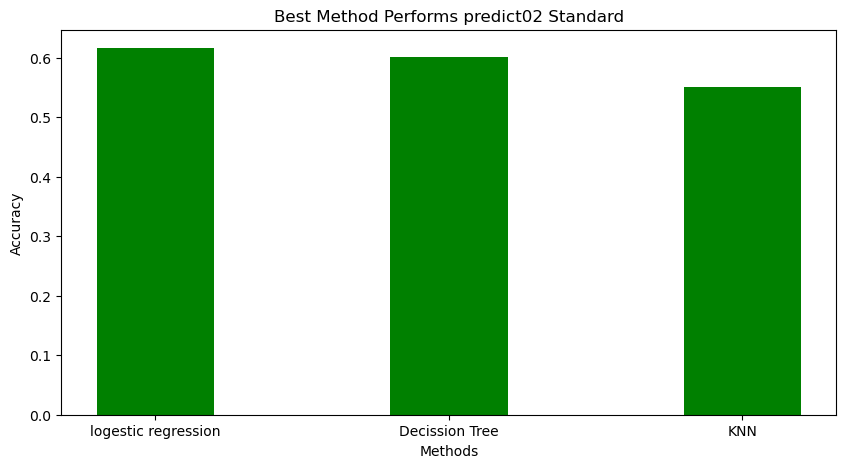

In [35]:
fig= plt.figure(figsize=(10,5))
plt.bar(Method, accu, width=0.4, color='green')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Best Method Performs predict02 Standard')
plt.show()